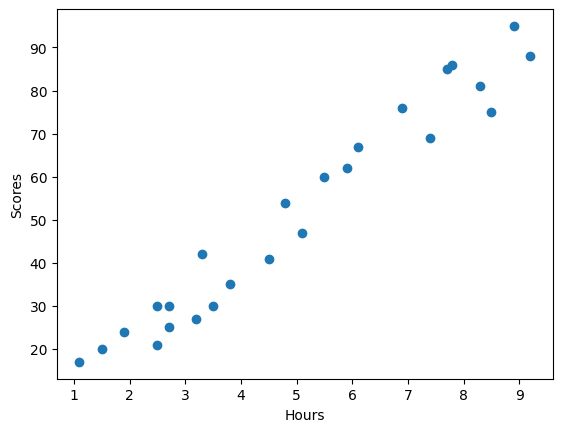

In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches

DATASET_PATH = './../../dataset/public/student_scores.csv'

loaded = np.genfromtxt(
    DATASET_PATH, 
    dtype='str',
    delimiter=','
)

labels, data = loaded[0], loaded[1:].astype(np.float64)

fig, ax = plt.subplots()
ax.scatter(data[:, 0], data[:, 1])
ax.set_xlabel(labels[0])
ax.set_ylabel(labels[1])
plt.show()

In [4]:
med_hours, med_score = np.median(data, axis=0)

message = f"""
-Статистические данные(Statistics)-

Кол-во записей(Observation count): {len(data)}

-{labels[0]}-
Среднее(Mean): {data[:, 0].mean()}
Медиана(Median): {med_hours}
Минимум(Min): {data[:, 0].min()}
Максимум(Max): {data[:, 0].max()}

-{labels[1]}-
Среднее(Mean): {data[:, 1].mean()}
Медиана(Median): {med_score}
Минимум(Min): {data[:, 1].min()}
Максимум(Max): {data[:, 1].max()}
"""

print(message)


-Статистические данные(Statistics)-

Кол-во записей(Observation count): 25

-Hours-
Среднее(Mean): 5.012
Медиана(Median): 4.8
Минимум(Min): 1.1
Максимум(Max): 9.2

-Scores-
Среднее(Mean): 51.48
Медиана(Median): 47.0
Минимум(Min): 17.0
Максимум(Max): 95.0



In [5]:
# Частный случай 1 признак
def fit_2D_regression(X: np.array, y: np.array) -> tuple[np.float64]:
    N = len(X)
    sum_X, sum_Y = np.sum(X), np.sum(y)
    sum_X2 = np.sum(X**2)
    sum_XY = np.sum(X * y)    

    w = (N * sum_XY - sum_X * sum_Y) / (N * sum_X2 - sum_X**2)
    b = (sum_Y - w * sum_X) / N

    return w, b

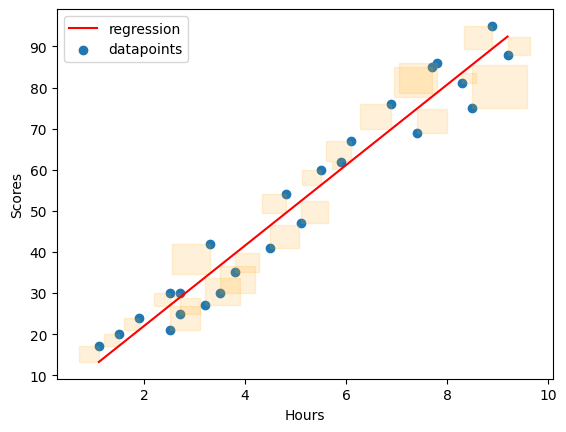

In [6]:
w, b = fit_2D_regression(data[:, 0], data[:, 1])

X = np.linspace(data[:, 0].min(), data[:, 0].max(), 10)
Y = w*X + b
Y_pred = w*data[:, 0] + b

fig, ax = plt.subplots()

ax.set_xlabel(labels[0])
ax.set_ylabel(labels[1])

ax.plot(X, Y, color='red', label='regression')

ax.scatter(data[:, 0], data[:, 1], label='datapoints')

for x_i, y_i in data:
    err = (w*x_i + b) - y_i
    # Шкала неравномерная, чтобы квадраты не размазало, поделим ширину на w
    err_box = patches.Rectangle((x_i, y_i), err / w, err, color='orange', alpha = 0.15)
    ax.add_patch(err_box)

plt.legend()
plt.show()

In [7]:
import sklearn.metrics as sklm

def scoring_procedure(y_true, y_pred, header=''):
    abs_err = abs(y_true - y_pred)
    mse = sklm.mean_squared_error(y_true, y_pred)
    report = f"""
    {header}
    MSE: {mse:.3f}
    RMSE: {np.sqrt(mse):.3f} 
    R2: {sklm.r2_score(y_true, y_pred):.3f}
    MAE: {sklm.mean_absolute_error(y_true, y_pred):.3f}
    MAPE: {sklm.mean_absolute_percentage_error(y_true, y_pred):.3f}
    Min abs err: {np.min(abs_err):.3f}
    Max abs err: {np.max(abs_err):.3f}
    """
    print(report)

In [8]:
scoring_procedure(data[:, 1], Y_pred)


    
    MSE: 28.883
    RMSE: 5.374 
    R2: 0.953
    MAE: 4.973
    MAPE: 0.118
    Min abs err: 1.122
    Max abs err: 10.578
    
